In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from api_keys import api_key
from citipy import citipy
output_data_file = "output_data/cities.csv"
lat_range = (-90, 90)
lng_range = (-180, 180)


In [2]:
lat_lngs = []
cities = []

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)

len(cities)


645

In [3]:
data_cities = pd.DataFrame({'City': [city for city in cities]})
data_cities["Cloudiness"] = ''
data_cities["Country"] =''
data_cities["Date"] = ''
data_cities["Humidity"]=''
data_cities["Lat"] = ''
data_cities["Lng"]=''
data_cities["Max Temp"] =''
data_cities["Wind Speed"]=''


In [4]:
sets = 1 
records = 0
max_records = 50
url = "http://api.openweathermap.org/data/2.5/weather?"
payload = {'unit' : 'imperial','appid' : api_key}

In [5]:
print("Beginning Data Retrieval")
print("-------------------------")

for index, row in data_cities.iterrows():
    city_name = row['City']
    payload["q"] = city_name
    weather_json = requests.get(url,params =payload).json()
    print(f"Proceesing Record {records} of Set {sets} | {city_name}")
    
    if records == max_records:
        time.sleep(1.01)
        sets +=1
        records = 0
    try: 
        data_cities.loc[index, "Cloudiness"] = weather_json["clouds"]["all"]
        data_cities.loc[index, "Country"]= weather_json["sys"]["country"]
        data_cities.loc[index, "Date"]=  weather_json["dt"]
        data_cities.loc[index, "Humidity"]= weather_json["main"]["humidity"]
        data_cities.loc[index, "Lat"]= weather_json["coord"]["lat"]
        data_cities.loc[index, "Lng"]= weather_json["coord"]["lon"]
        data_cities.loc[index, "Max Temp"]= weather_json["main"]["temp_max"]
        data_cities.loc[index, "Wind Speed"]= weather_json["wind"]["speed"]
        
    except:
        print("City not found. Skipping...")
    records +=1 
print("-------------------------")    
print("Data Retrieval Complete")
print("-------------------------") 
   

Beginning Data Retrieval
-------------------------
Proceesing Record 0 of Set 1 | dolgorukovo
Proceesing Record 1 of Set 1 | mitsamiouli
Proceesing Record 2 of Set 1 | buqayq
City not found. Skipping...
Proceesing Record 3 of Set 1 | nikolskoye
Proceesing Record 4 of Set 1 | castro
Proceesing Record 5 of Set 1 | jamestown
Proceesing Record 6 of Set 1 | east london
Proceesing Record 7 of Set 1 | ushuaia
Proceesing Record 8 of Set 1 | zelenokumsk
Proceesing Record 9 of Set 1 | sorland
Proceesing Record 10 of Set 1 | rungata
City not found. Skipping...
Proceesing Record 11 of Set 1 | kamenskoye
City not found. Skipping...
Proceesing Record 12 of Set 1 | bambous virieux
Proceesing Record 13 of Set 1 | saldanha
Proceesing Record 14 of Set 1 | rikitea
Proceesing Record 15 of Set 1 | leningradskiy
Proceesing Record 16 of Set 1 | georgetown
Proceesing Record 17 of Set 1 | cherskiy
Proceesing Record 18 of Set 1 | albany
Proceesing Record 19 of Set 1 | abha
Proceesing Record 20 of Set 1 | coari


Proceesing Record 37 of Set 4 | tadine
Proceesing Record 38 of Set 4 | palabuhanratu
City not found. Skipping...
Proceesing Record 39 of Set 4 | santa maria
Proceesing Record 40 of Set 4 | lompoc
Proceesing Record 41 of Set 4 | akureyri
Proceesing Record 42 of Set 4 | kahului
Proceesing Record 43 of Set 4 | chabahar
Proceesing Record 44 of Set 4 | gandevi
Proceesing Record 45 of Set 4 | oranjemund
Proceesing Record 46 of Set 4 | touros
Proceesing Record 47 of Set 4 | benguela
Proceesing Record 48 of Set 4 | male
Proceesing Record 49 of Set 4 | linhares
Proceesing Record 50 of Set 4 | tuatapere
Proceesing Record 1 of Set 5 | mokhotlong
Proceesing Record 2 of Set 5 | takoradi
Proceesing Record 3 of Set 5 | okhotsk
Proceesing Record 4 of Set 5 | iqaluit
Proceesing Record 5 of Set 5 | avarua
Proceesing Record 6 of Set 5 | praia da vitoria
Proceesing Record 7 of Set 5 | alexandria
Proceesing Record 8 of Set 5 | tilichiki
Proceesing Record 9 of Set 5 | milledgeville
Proceesing Record 10 of S

Proceesing Record 20 of Set 8 | piacabucu
Proceesing Record 21 of Set 8 | goderich
Proceesing Record 22 of Set 8 | kirakira
Proceesing Record 23 of Set 8 | conceicao do araguaia
Proceesing Record 24 of Set 8 | mawlaik
Proceesing Record 25 of Set 8 | aswan
Proceesing Record 26 of Set 8 | lubango
Proceesing Record 27 of Set 8 | buala
Proceesing Record 28 of Set 8 | tawkar
City not found. Skipping...
Proceesing Record 29 of Set 8 | bairiki
City not found. Skipping...
Proceesing Record 30 of Set 8 | alfredo chaves
Proceesing Record 31 of Set 8 | marsh harbour
Proceesing Record 32 of Set 8 | rio grande
Proceesing Record 33 of Set 8 | sambava
Proceesing Record 34 of Set 8 | nanortalik
Proceesing Record 35 of Set 8 | eydhafushi
Proceesing Record 36 of Set 8 | abidjan
Proceesing Record 37 of Set 8 | christchurch
Proceesing Record 38 of Set 8 | amapa
Proceesing Record 39 of Set 8 | sibenik
Proceesing Record 40 of Set 8 | constitucion
Proceesing Record 41 of Set 8 | port-gentil
Proceesing Record

Proceesing Record 2 of Set 12 | trindade
Proceesing Record 3 of Set 12 | mount isa
Proceesing Record 4 of Set 12 | navirai
Proceesing Record 5 of Set 12 | kavaratti
Proceesing Record 6 of Set 12 | coihueco
Proceesing Record 7 of Set 12 | asti
Proceesing Record 8 of Set 12 | westport
Proceesing Record 9 of Set 12 | iracoubo
Proceesing Record 10 of Set 12 | lashio
Proceesing Record 11 of Set 12 | omboue
Proceesing Record 12 of Set 12 | payo
Proceesing Record 13 of Set 12 | santa cruz del sur
Proceesing Record 14 of Set 12 | gorkovskoye
City not found. Skipping...
Proceesing Record 15 of Set 12 | mabaruma
Proceesing Record 16 of Set 12 | san quintin
Proceesing Record 17 of Set 12 | zlynka
Proceesing Record 18 of Set 12 | quebo
City not found. Skipping...
Proceesing Record 19 of Set 12 | fare
Proceesing Record 20 of Set 12 | geresk
City not found. Skipping...
Proceesing Record 21 of Set 12 | ngunguru
Proceesing Record 22 of Set 12 | el real de santa maria
Proceesing Record 23 of Set 12 | m

In [31]:
data_cities.to_csv("output_data/cities.csv")
file = pd.read_csv("output_data/cities.csv",index_col=0).dropna()
file.to_csv("output_data/cities.csv")

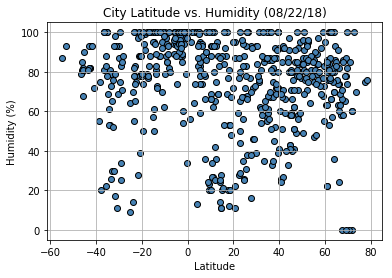

In [38]:
plt.scatter(
file['Lat'],
file['Humidity'],marker="o", facecolors="steelblue", edgecolors="black")
plt.title("City Latitude vs. Humidity (08/22/18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/Humidity_vs_Latitude.png")
plt.show()

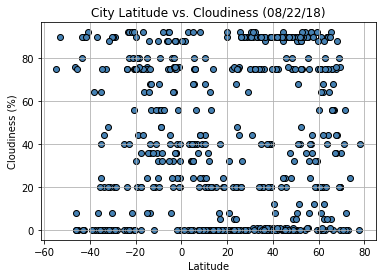

In [39]:
plt.scatter(
file['Lat'],
file['Cloudiness'],marker="o", facecolors="steelblue", edgecolors="black")
plt.title("City Latitude vs. Cloudiness (08/22/18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/Cloudiness_vs_Latitude.png")
plt.show()

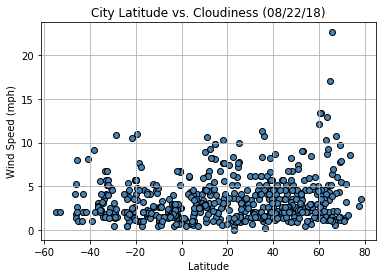

In [40]:
plt.scatter(
file['Lat'],
file['Wind Speed'],marker="o", facecolors="steelblue", edgecolors="black")
plt.title("City Latitude vs. Cloudiness (08/22/18)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/WindSpeed_vs_Latitude.png")
plt.show()